In [1]:
# Import libraries
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


%matplotlib inline


In [2]:
# Read in dataset
df = pd.read_csv("optdigits.tra", header=None)
X= df.loc[:,0:63].values
y= df.loc[:,64].values

Expected value from image: 0


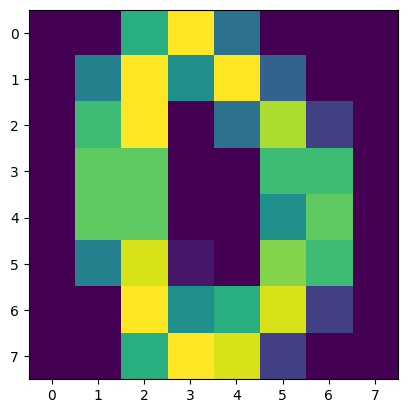

In [3]:
# Checking on reading the right image
X_check = X.reshape(-1,8,8)
img_index = 1
plt.imshow(X_check[img_index,...])
plt.savefig("test.png")
print("Expected value from image:", y[img_index])

Sicne the expected value align (or at least close to) the image shown above, it is safe to train the random forest model

In [4]:
# Splitting the test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 64 )

I would pick max_depth at the first parameter to tune. 
By limiting the depth of tree, it is possible to reduce chance of overfitting and avoid complicated tree
For testing value, I would put max_depth to 5. Although it might lower the accuracy, I could have a result quickly. Then, I might move on to test on other parameter.

In [5]:
# Creating forest with 5 max_depth
forest = RandomForestClassifier(max_depth = 5)
forest.fit(X_train, y_train)

# Getting accuracy of this model
print("Accuracy:", forest.score(X_test,y_test))

Accuracy: 0.9320261437908497


In [6]:
# Using GridSearchCV to find best result
params = {
    'max_depth' : [5, 6, 7, 8, 10, 15, 20, 50],
    'n_estimators' : [5, 10, 15, 20, 30, 50, 100]
}
grid_search = GridSearchCV(estimator = forest,
                           param_grid = params,
                           cv = 4,
                           scoring="accuracy")
grid_search.fit(X_train, y_train)

# Getting best score and estimator
print('Best score : ',grid_search.best_score_)
print(grid_search.best_estimator_)

Best score :  0.9780891763337097
RandomForestClassifier(max_depth=20)


In [10]:
# Use above suggested p
forest_tuned = RandomForestClassifier(max_depth = 20)
forest_tuned.fit(X_train, y_train)
# Finding accuracy of tuned model
y_pred = forest_tuned.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred))

Accuracy: 0.984313725490196


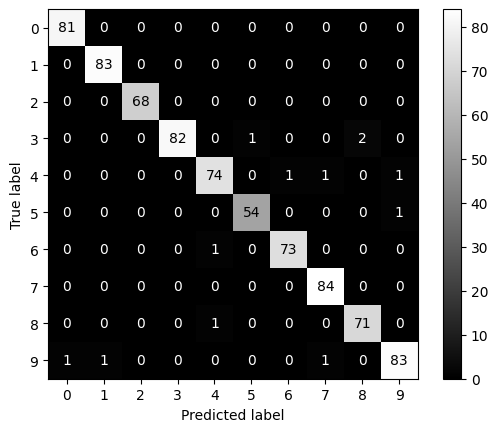

In [11]:
# Generating confusion matrix and display
conf_mat= confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_mat)
disp.plot(cmap='gist_gray')
plt.show()

There are no outstandding missclassifications is shown in the model

In [9]:
av_f1_sciki = f1_score(y_test, y_pred, average='macro')
prec_sciki = precision_score(y_test, y_pred, average='macro' )
rec_sciki = recall_score(y_test, y_pred, average='macro' )
print(f"Score of current model\nAverage F1: {av_f1_sciki}\nPrecision: {prec_sciki}\nRecall: {rec_sciki}")

Score of current model
Average F1: 0.9788752082317854
Precision: 0.9788721836471457
Recall: 0.9791073304935456
